**Table of contents**<a id='toc0_'></a>    
- [Gestion de l'envrionnement de travail.](#toc1_)    
  - [Import des données](#toc1_1_)    
- [Préparation des données et étude statistique](#toc2_)    
  - [Génération de l'étiquette binaire "passoire énergétique"](#toc2_1_)    
  - [Traitement des données manquantes.](#toc2_2_)    
  - [Analyse des distributions](#toc2_3_)    
  - [Analyse des corrélations entre les variables explicatives.](#toc2_4_)    
  - [Analyse des liens entre les varaibles explicatives et la variable cible](#toc2_5_)    
  - [Encodage des variables catégorielles](#toc2_6_)    
  - [Echantillonage](#toc2_7_)    
  - [Répartition des classes](#toc2_8_)    
  - [Affichage d'un extrait de X_train et X_test](#toc2_9_)    
- [Arbre de décision](#toc3_)    
  - [Lancer l'apprentissage](#toc3_1_)    
  - [Affichage de l'arbre de décision](#toc3_2_)    
  - [Predire sur l'échantillon test](#toc3_3_)    
  - [Evaluation du modèle](#toc3_4_)    
  - [Calcul du taux d'erreur.](#toc3_5_)    
  - [Calcul de la precision](#toc3_6_)    
  - [Calculer ces métriques avec l'approche macro non pondéré](#toc3_7_)    
  - [Calculer ces métriques avec l'approche macro pondéré](#toc3_8_)    
  - [Validation croisée](#toc3_9_)    
  - [Optimisation de paramètres](#toc3_10_)    
  - [Aprentissage avec grid search](#toc3_11_)    
  - [Afficher le meilleur modèle](#toc3_12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Gestion de l'envrionnement de travail.](#toc0_)

In [1]:
# Import des librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_predict,
    cross_val_score,
    train_test_split,
)
from sklearn.tree import DecisionTreeClassifier, plot_tree

## <a id='toc1_1_'></a>[Import des données](#toc0_)

In [2]:
# Import des données
df = pd.read_csv("output/existants_69.csv")

/var/folders/vm/277zr2vx0wv9k3k3scsf5mh00000gn/T/ipykernel_10703/1440692902.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("output/existants_69.csv")


In [3]:
# Affichage de la répartition des étiquettes DPE
df["etiquette_dpe"].value_counts(normalize=True)

etiquette_dpe
D    0.331469
C    0.292433
E    0.199562
F    0.084901
G    0.062178
B    0.024074
A    0.005383
Name: proportion, dtype: float64

# <a id='toc2_'></a>[Préparation des données et étude statistique](#toc0_)

## <a id='toc2_1_'></a>[Génération de l'étiquette binaire "passoire énergétique"](#toc0_)

In [4]:
df["passoire_energetique"] = df["etiquette_dpe"].isin(["F", "G"])

## <a id='toc2_2_'></a>[Traitement des données manquantes.](#toc0_)

In [5]:
# Vérification des données manquantes
ls_variables_explicatives = [
    "annee_construction",
    "surface_habitable_logement",
    "cout_total_5_usages",
    "cout_ecs",
    "cout_chauffage",
    "cout_eclairage",
    "cout_auxiliaires",
    "cout_refroidissement",
    "type_energie_n1",
]

In [6]:
# Vérification des données manquantes
df[ls_variables_explicatives].isnull().sum()
# Remplacer les valeurs NA par la moyenne des colonnes
for col in ls_variables_explicatives:
    try:
        df[col] = df[col].fillna(df[col].mean())
    except:
        print(f"Erreur sur la colonne {col}")

Erreur sur la colonne type_energie_n1


## <a id='toc2_3_'></a>[Analyse des distributions](#toc0_)

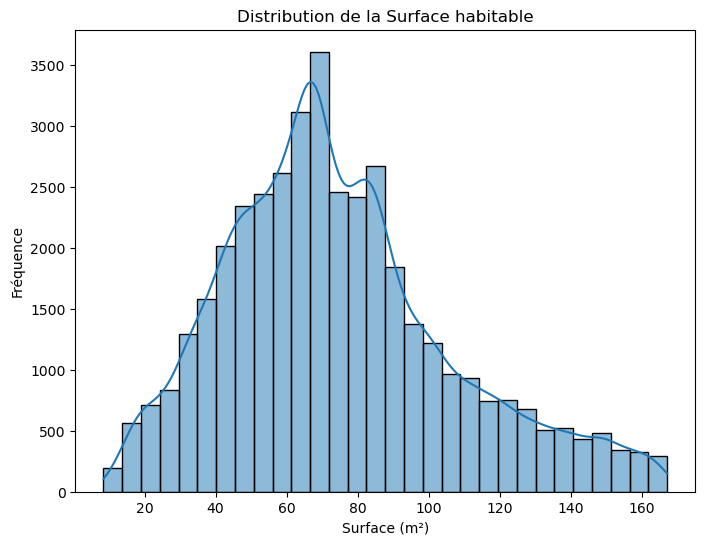

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppression des outliers par la méthode interquartile
Q1 = df["surface_habitable_logement"].quantile(0.25)
Q3 = df["surface_habitable_logement"].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - (1.5 * IQR)
borne_sup = Q3 + (1.5 * IQR)

surface_without_outliers = df[
    (df["surface_habitable_logement"] < borne_sup)
    & (df["surface_habitable_logement"] > borne_inf)
].loc[:, "surface_habitable_logement"]


# Distribution de la surface
plt.figure(figsize=(8, 6))
sns.histplot(surface_without_outliers, bins=30, kde=True)
plt.title("Distribution de la Surface habitable")
plt.xlabel("Surface (m²)")
plt.ylabel("Fréquence")
plt.show()

In [8]:
surface_without_outliers = px.data.tips()
fig = px.histogram(df, x="surface_habitable_logement")
fig.show()

## <a id='toc2_4_'></a>[Analyse des corrélations entre les variables explicatives.](#toc0_)

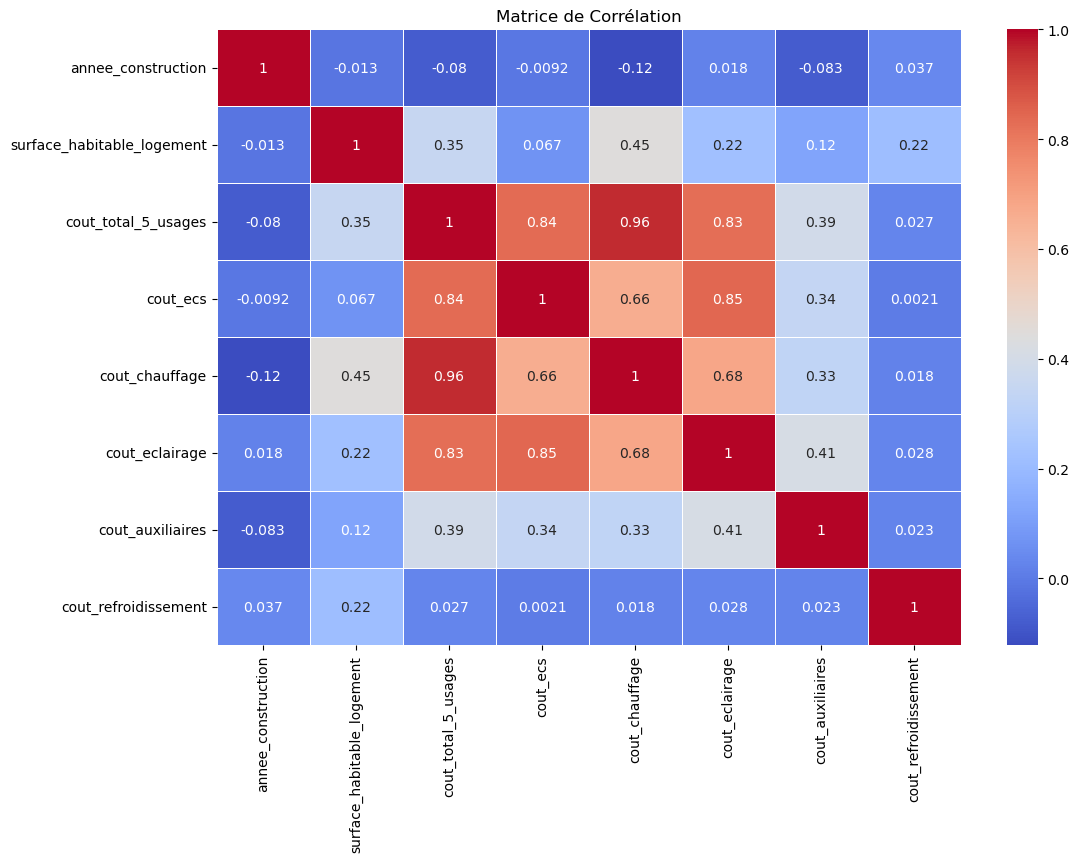

In [9]:
# Calcul de la matrice de corrélation
corr_matrix = df[ls_variables_explicatives[:-1]].corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## <a id='toc2_5_'></a>[Analyse des liens entre les varaibles explicatives et la variable cible](#toc0_)

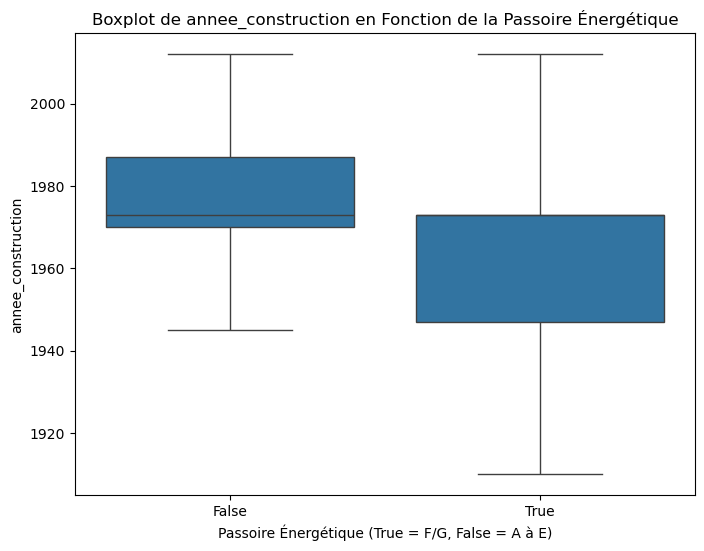

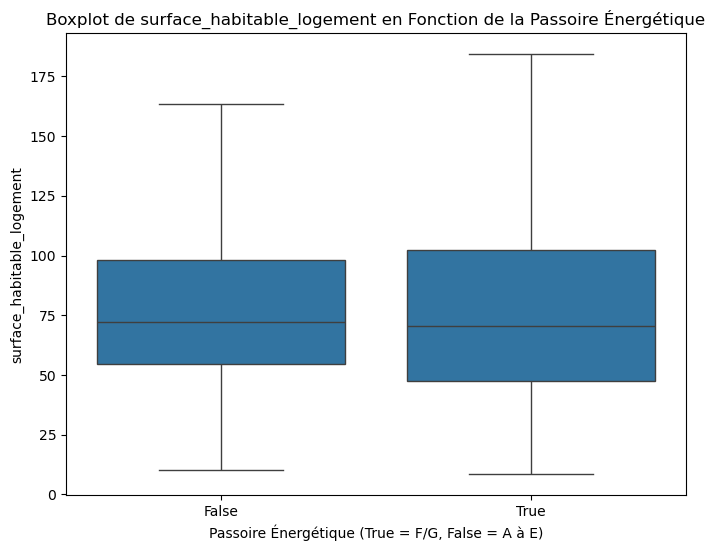

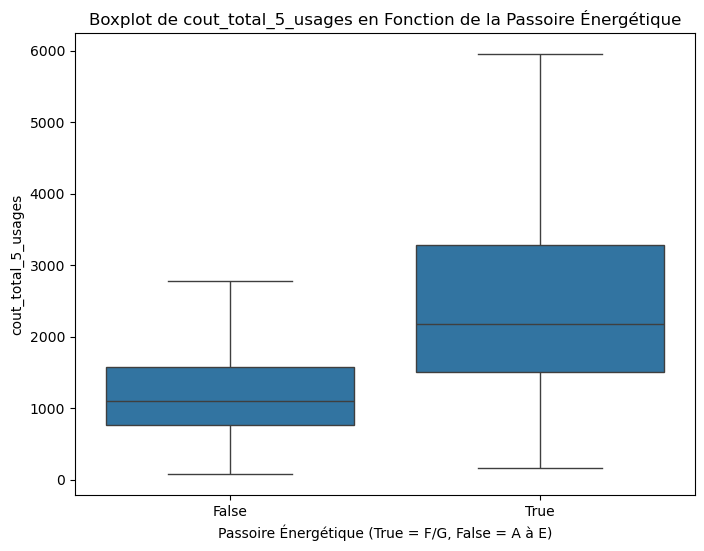

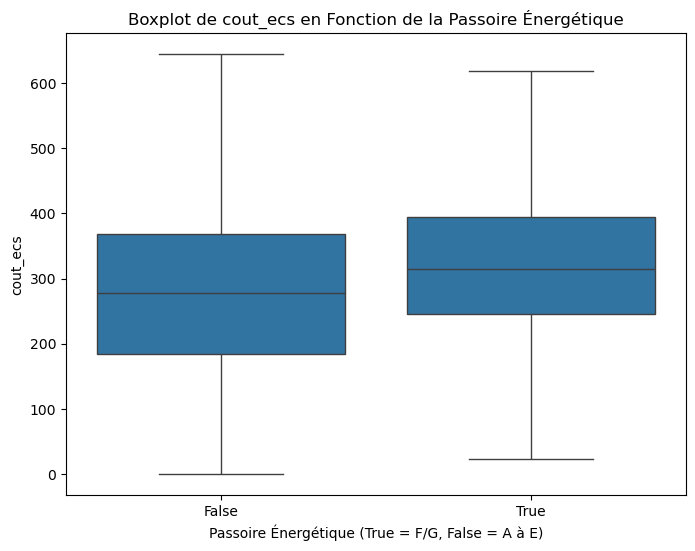

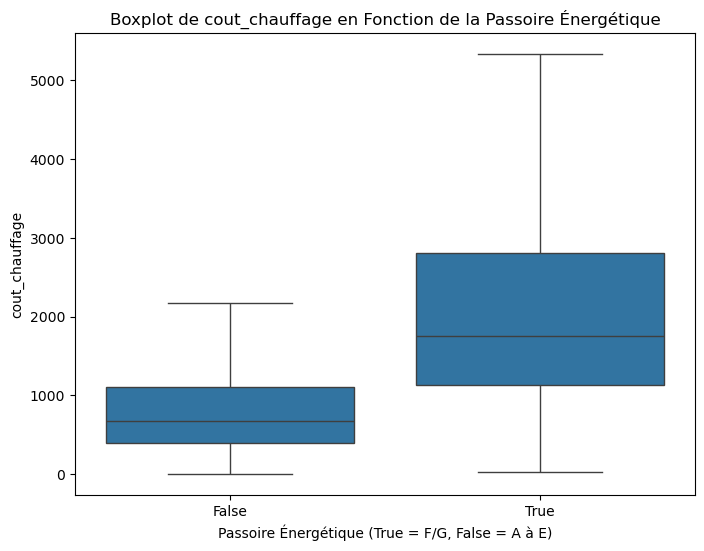

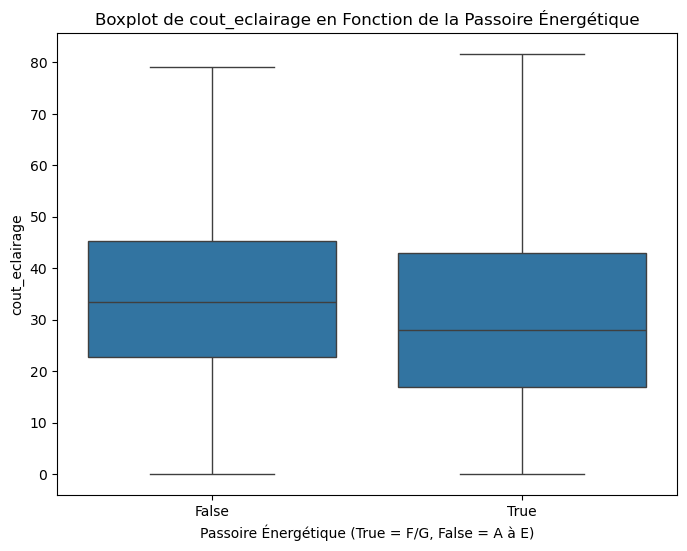

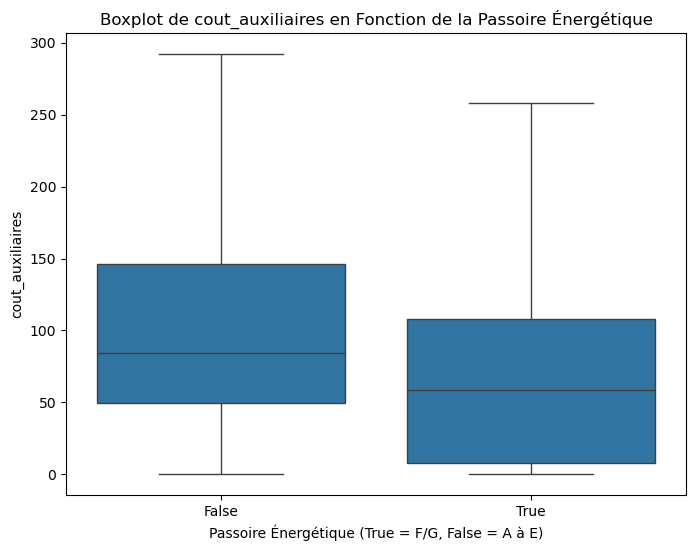

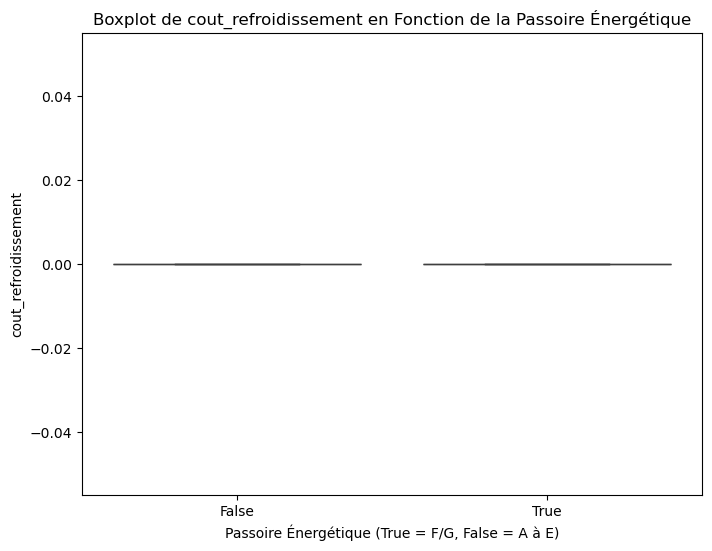

In [10]:
# Boxplot de chaque variable explicative par rapport à la passoire énergétique
for col in ls_variables_explicatives[:-1]:
    plt.figure(figsize=(8, 6))

    # Tracer le boxplot sans les outliers
    sns.boxplot(x="passoire_energetique", y=col, data=df, showfliers=False)

    # Automatiser le titre avec le nom de la colonne
    plt.title(f"Boxplot de {col} en Fonction de la Passoire Énergétique")

    plt.xlabel("Passoire Énergétique (True = F/G, False = A à E)")
    plt.ylabel(f"{col}")  # Automatiser l'étiquette de l'axe y avec le nom de la colonne
    plt.show()

## <a id='toc2_6_'></a>[Encodage des variables catégorielles](#toc0_)


In [11]:
# Concaténer les deux listes : ls_variables_explicatives et ['passoire_energetique']
df = df[ls_variables_explicatives + ["passoire_energetique"]]
df = pd.get_dummies(df, columns=["type_energie_n1"], drop_first=True)

## <a id='toc2_7_'></a>[Echantillonage](#toc0_)

In [12]:
# Utiliser set.difference() pour exclure la colonne cible de ls_variables_explicatives
X = df[df.columns.difference(["passoire_energetique"])]
Y = df["passoire_energetique"]

In [13]:
# Génération des ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, stratify=Y, random_state=42
)

## <a id='toc2_8_'></a>[Répartition des classes](#toc0_)

In [14]:
y_train.value_counts(normalize=True)

passoire_energetique
False    0.85291
True     0.14709
Name: proportion, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

passoire_energetique
False    0.852948
True     0.147052
Name: proportion, dtype: float64

## <a id='toc2_9_'></a>[Affichage d'un extrait de X_train et X_test](#toc0_)

In [16]:
print(X_train.shape)
print(X_test.shape)
X_test.head()


(30036, 20)
(12873, 20)


,annee_construction,cout_auxiliaires,cout_chauffage,cout_eclairage,cout_ecs,cout_refroidissement,cout_total_5_usages,surface_habitable_logement,type_energie_n1_Bois – Granulés (pellets) ou briquettes,type_energie_n1_Bois – Plaquettes d’industrie,type_energie_n1_Bois – Plaquettes forestières,type_energie_n1_Butane,type_energie_n1_Charbon,type_energie_n1_Fioul domestique,type_energie_n1_GPL,type_energie_n1_Gaz naturel,type_energie_n1_Propane,type_energie_n1_Réseau de Chauffage urbain,type_energie_n1_Électricité,type_energie_n1_Électricité d'origine renouvelable utilisée dans le bâtiment
25818,1869.000000,95.0,1882.0,54.0,619.0,0.0,2650.0,162.0,False,False,False,False,False,True,False,False,False,False,False,False
24217,2004.000000,180.3,668.0,39.2,192.7,0.0,1080.2,72.7,False,False,False,False,False,False,False,True,False,False,False,False
41514,1973.070828,67.9,1258.1,38.5,169.0,0.0,1533.6,71.5,False,False,False,False,False,False,False,True,False,False,False,False
34136,1973.070828,86.2,2551.7,116.4,200.2,0.0,2954.6,215.8,False,False,False,False,False,False,False,True,False,False,False,False
41870,1970.000000,108.6,559.6,27.2,97.9,0.0,793.2,50.4,False,False,False,False,False,False,False,True,False,False,False,False


# <a id='toc3_'></a>[Arbre de décision](#toc0_)

## <a id='toc3_1_'></a>[Lancer l'apprentissage](#toc0_)

In [17]:
model_arbre = DecisionTreeClassifier(
    max_depth=3, min_samples_leaf=50, min_samples_split=100
)
model_arbre = model_arbre.fit(X_train, y_train)

## <a id='toc3_2_'></a>[Affichage de l'arbre de décision](#toc0_)

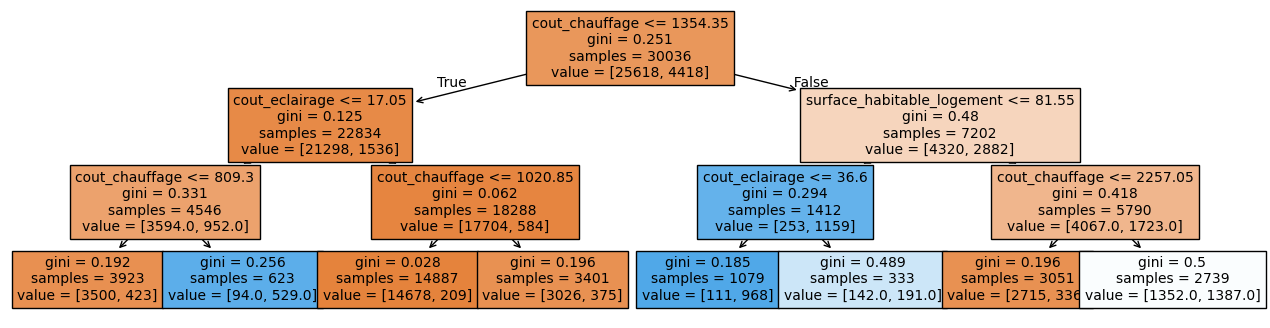

In [18]:
plt.figure(figsize=(16, 4))
plot_tree(model_arbre, feature_names=list(X.columns), filled=True, fontsize=10)
plt.show()

## <a id='toc3_3_'></a>[Predire sur l'échantillon test](#toc0_)

In [19]:
y_pred = model_arbre.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False], shape=(12873,))

In [20]:
# Evaluation des probabilités
y_pred_proba = model_arbre.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.88987217, 0.11012783],
       [0.98596091, 0.01403909],
       [0.88973831, 0.11026169],
       [0.49361081, 0.50638919],
       [0.98596091, 0.01403909],
       [0.98596091, 0.01403909],
       [0.89217436, 0.10782564],
       [0.89217436, 0.10782564],
       [0.98596091, 0.01403909],
       [0.88987217, 0.11012783]])

## <a id='toc3_4_'></a>[Evaluation du modèle](#toc0_)

In [21]:
mc = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=["pred_0", "pred_1"],
    index=["obs_0", "obs_1"],
)

mc

# ou

pd.crosstab(y_test, y_pred, colnames=["pred"], rownames=["obs"], margins=True)

pred,False,True,All
obs,,,
False,10218,762,10980
True,585,1308,1893
All,10803,2070,12873


## <a id='toc3_5_'></a>[Calcul du taux d'erreur.](#toc0_)

In [22]:
1 - accuracy_score(y_test, y_pred)

0.10463761360988111

## <a id='toc3_6_'></a>[Calcul de la precision](#toc0_)

In [23]:
print(
    "precision : " + str(precision_score(y_test, y_pred, average="binary", pos_label=0))
)

precision : 0.9458483754512635


In [24]:
print("recall :" + str(recall_score(y_test, y_pred, average="binary", pos_label=0)))

recall :0.9306010928961749


F1-Score

In [25]:
print("f1_score : " + str(f1_score(y_test, y_pred, average="binary", pos_label=0)))

f1_score : 0.9381627874948354


## <a id='toc3_7_'></a>[Calculer ces métriques avec l'approche macro non pondéré](#toc0_)

In [26]:
print("recall : " + str(recall_score(y_test, y_pred, average="macro")))
print("precision : " + str(precision_score(y_test, y_pred, average="macro")))
print("f1_score : " + str(f1_score(y_test, y_pred, average="macro")))

recall : 0.8107839061945217
precision : 0.7888662167111391
f1_score : 0.7991343839063882


## <a id='toc3_8_'></a>[Calculer ces métriques avec l'approche macro pondéré](#toc0_)

In [27]:
print("recall : " + str(recall_score(y_test, y_pred, average="weighted")))
print("precision : " + str(precision_score(y_test, y_pred, average="weighted")))
print("f1_score : " + str(f1_score(y_test, y_pred, average="weighted")))

recall : 0.8953623863901189
precision : 0.8996793042953473
f1_score : 0.897273986439459


## <a id='toc3_9_'></a>[Validation croisée](#toc0_)

In [28]:
# Création d'un modèle d'arbre de décision
model_arbre_cv = DecisionTreeClassifier(random_state=42)

# Mise en œuvre de la validation croisée
# Ici, nous utilisons une validation croisée à 5 plis
cv_scores = cross_val_score(model_arbre_cv, X_train, y_train, cv=5, scoring="f1_macro")

# Affichage des scores de validation croisée
print(f"Scores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

# Entraînement du modèle sur l'ensemble d'entraînement
model_arbre_cv.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_arbre_cv = model_arbre_cv.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred_arbre_cv))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(y_test, y_pred_arbre_cv)}")

Scores de validation croisée : [0.89984004 0.89824042 0.90908577 0.89852403 0.90462458]
Moyenne des scores de validation croisée : 0.9020629692730953
              precision    recall  f1-score   support

       False       0.97      0.97      0.97     10980
        True       0.83      0.84      0.84      1893

    accuracy                           0.95     12873
   macro avg       0.90      0.91      0.91     12873
weighted avg       0.95      0.95      0.95     12873

Accuracy sur l'ensemble de test : 0.9523032704109377


## <a id='toc3_10_'></a>[Optimisation de paramètres](#toc0_)

In [29]:
# cette fois-ci on utilise numpy pour générer des séquences à la place des listes
parameters = {
    "max_depth": np.arange(start=1, stop=10, step=1),
    "min_samples_leaf": np.arange(start=5, stop=250, step=50),
    "min_samples_split": np.arange(start=10, stop=500, step=50),
}
# Calculer le nombre de valeurs pour chaque paramètre
total_combinaisons = (
    len(parameters["max_depth"])
    * len(parameters["min_samples_leaf"])
    * len(parameters["min_samples_split"])
)

print(f"Nombre total de modèles à tester: {total_combinaisons}")

Nombre total de modèles à tester: 450


## <a id='toc3_11_'></a>[Aprentissage avec grid search](#toc0_)

In [30]:
model_arbre_grid = DecisionTreeClassifier()
score = make_scorer(f1_score, pos_label=0)
model_arbre_grid = GridSearchCV(
    model_arbre_grid, parameters, scoring=score, verbose=2, cv=5
)
model_arbre_grid.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=110; total time=   0.0s
[CV] END max_depth=1, 

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': array([1, 2, ..., 6, 7, 8, 9]), 'min_samples_leaf': array([ 5, ...05, 155, 205]), 'min_samples_split': array([ 10, ...60, 410, 460])}"
,scoring,"make_scorer(f..., pos_label=0)"
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


## <a id='toc3_12_'></a>[Afficher le meilleur modèle](#toc0_)

In [31]:
print(
    "Voici les paramètres du meilleure modèle : "
    + str(model_arbre_grid.best_estimator_)
)
print(
    "Voici le "
    + str(model_arbre_grid.scorer_)
    + " du meilleure modèle : "
    + str(model_arbre_grid.best_score_)
)

Voici les paramètres du meilleure modèle : DecisionTreeClassifier(max_depth=np.int64(9), min_samples_leaf=np.int64(5),
                       min_samples_split=np.int64(10))
Voici le make_scorer(f1_score, response_method='predict', pos_label=0) du meilleure modèle : 0.9736707103031152


## Prédire avec la meilleure combinaison de paramètres.

In [32]:
# Prédictions sur l'ensemble de test avec le meilleur modèle
y_pred_arbre_grid = model_arbre_grid.predict(X_test)

## Evaluer le modèle avec la meilleure combinaison de paramètres

In [33]:
# Évaluation du modèle
print(classification_report(y_test, y_pred_arbre_grid))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(y_test, y_pred_arbre_grid)}")
print(
    "recall :"
    + str(recall_score(y_test, y_pred_arbre_grid, average="binary", pos_label=0))
)
print(
    "precision : "
    + str(precision_score(y_test, y_pred_arbre_grid, average="binary", pos_label=0))
)
print(
    "f1_score : "
    + str(f1_score(y_test, y_pred_arbre_grid, average="binary", pos_label=0))
)

              precision    recall  f1-score   support

       False       0.96      0.98      0.97     10980
        True       0.88      0.79      0.83      1893

    accuracy                           0.95     12873
   macro avg       0.92      0.89      0.90     12873
weighted avg       0.95      0.95      0.95     12873

Accuracy sur l'ensemble de test : 0.9537015458712033
recall :0.9818761384335155
precision : 0.9644838074789766
f1_score : 0.9731022655474321


## Courbe ROC pour comparer les modèles.

In [34]:
# Prédire les probabilités pour la classe positive (1)
y_proba_cv = model_arbre_cv.predict_proba(X_test)[:, 1]
y_proba_grid = model_arbre_grid.predict_proba(X_test)[:, 1]

In [35]:
# Calculer les courbes ROC
fpr1, tpr1, _ = roc_curve(y_test, y_proba_cv)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_grid)

# Calculer l'AUC pour chaque modèle (Area Under the Curve)
auc1 = roc_auc_score(y_test, y_proba_cv)
auc2 = roc_auc_score(y_test, y_proba_grid)

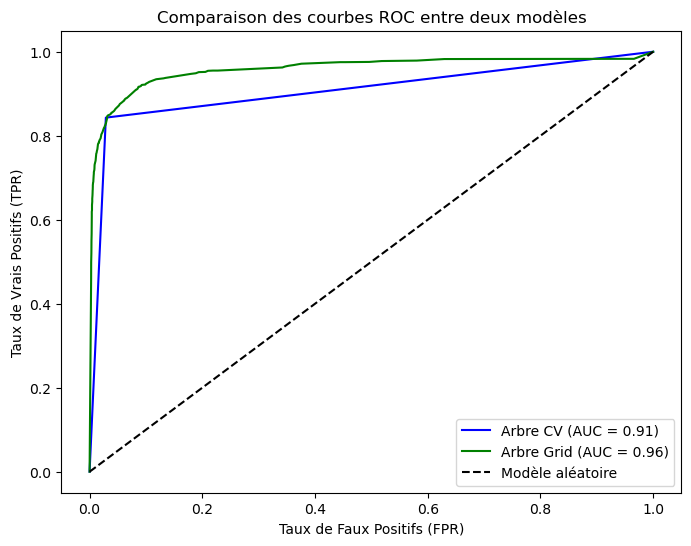

In [36]:
# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f"Arbre CV (AUC = {auc1:.2f})", color="blue")
plt.plot(fpr2, tpr2, label=f"Arbre Grid (AUC = {auc2:.2f})", color="green")

# Ajouter la diagonale (aléatoire)
plt.plot([0, 1], [0, 1], "k--", label="Modèle aléatoire")

# Ajouter des labels et un titre
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Comparaison des courbes ROC entre deux modèles")
plt.legend(loc="lower right")

# Afficher le graphique
plt.show()

# D'autres méthodes

## KNN